In [1]:
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import scipy.stats as stats
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from Image_Similarity_Modules import * 

In [3]:
imgs_dir = os.getcwd() + '\Image Similarity\dev_dataset'
os.chdir(imgs_dir)

## Step 1
### Preprocessing 
Loading the images and adding the padding. 

In [4]:
img_arrs = get_img_array(imgs_dir)
h, w = get_h_w(img_arrs)
padded_imgs = get_padded(img_arrs, h, w)

In [5]:
padded_imgs = np.stack(padded_imgs, axis = 0)

In [6]:
colors = ['red', 'green', 'blue']

## Step 2.
### Exploratory Data Analysis
1) Plotting the RGB histograms

In [9]:
colors

['Red', 'Green', 'Blue']

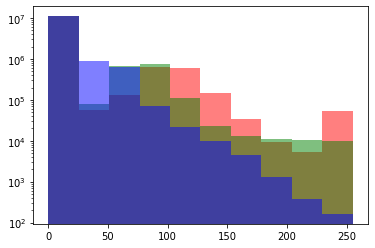

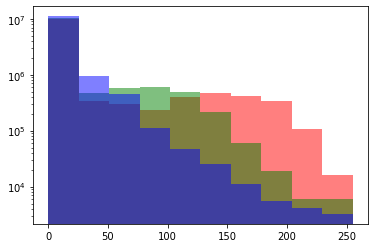

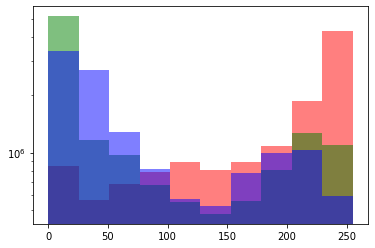

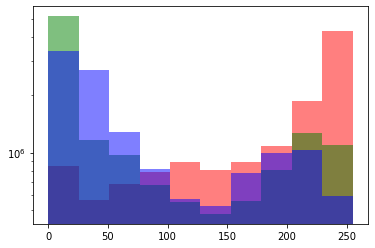

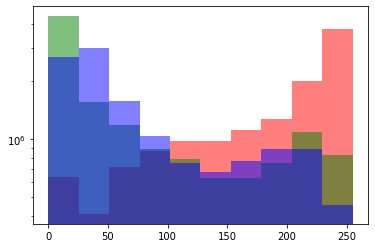

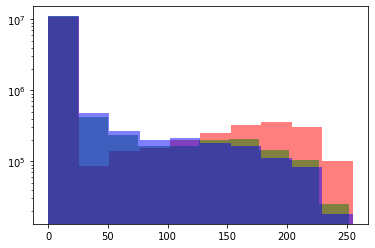

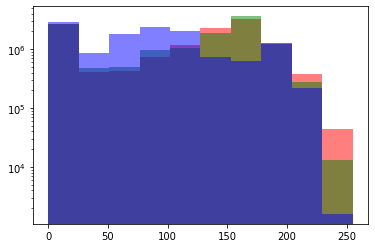

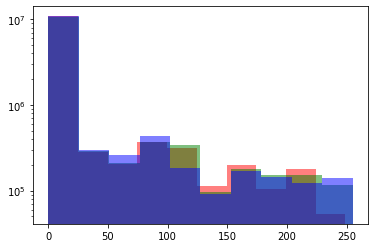

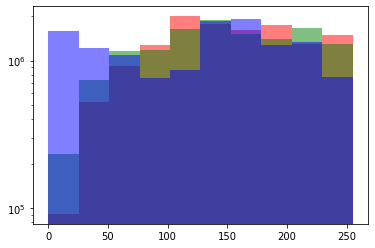

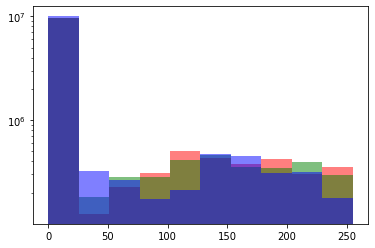

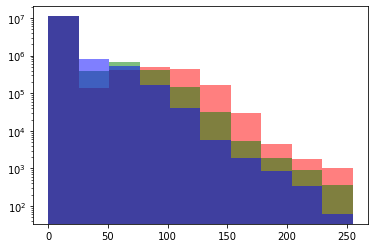

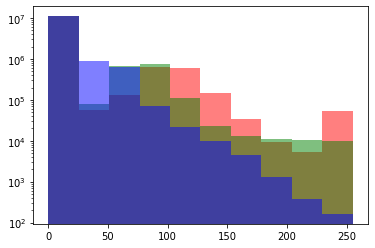

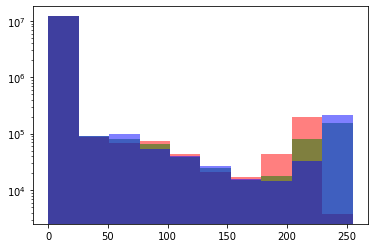

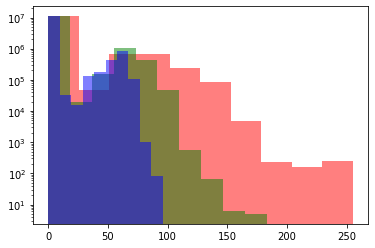

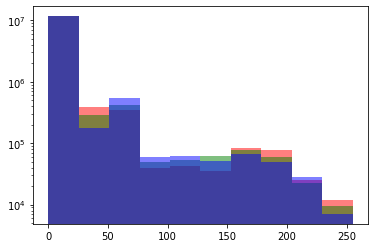

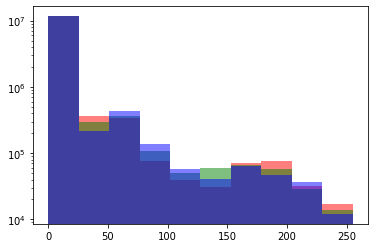

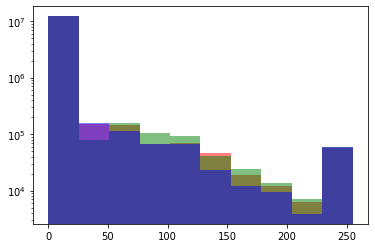

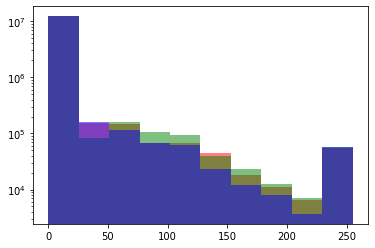

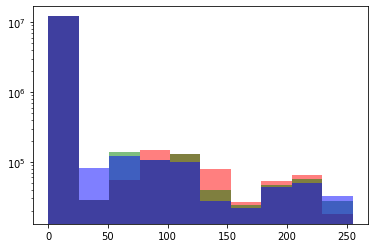

In [12]:
colors = ['red', 'green', 'blue']
imgs_red_df = pd.DataFrame(columns=['Img index', 'Img name', 'red Mean', 'red Median', 'red Mode'])
imgs_green_df = pd.DataFrame(columns=['Img index', 'Img name', 'green Mean', 'green Median', 'green Mode'])
imgs_blue_df = pd.DataFrame(columns=['Img index', 'Img name', 'blue Mean', 'blue Median', 'blue Mode'])
df_list = [imgs_red_df, imgs_green_df, imgs_blue_df]

for i in range(len(padded_imgs)):
    for j in range(3):
        get_histograms(colors[j], padded_imgs[i], show=False)
        df_list[j] = df_list[j].append({'Img index': i, 'Img name': os.listdir(imgs_dir)[i], 
                                 (colors[j] + ' Mean'): np.mean(img_arrs[i][:, j]), 
                                 (colors[j] + ' Median'):np.median(img_arrs[i][:, j]),  
                                 (colors[j] + ' Mode'): stats.mode(img_arrs[i][:, j].ravel())[0]}, ignore_index=True)

    plt.show()

2) Plotting the Grayscale histograms

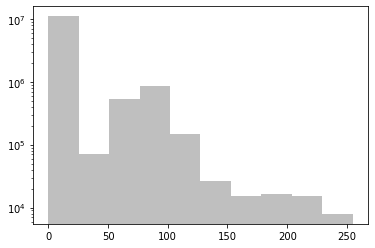

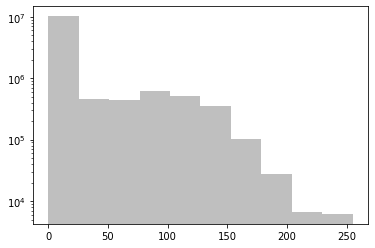

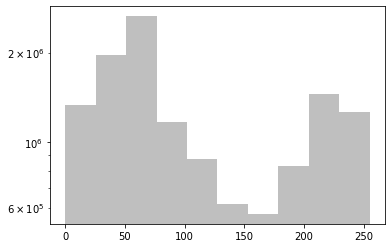

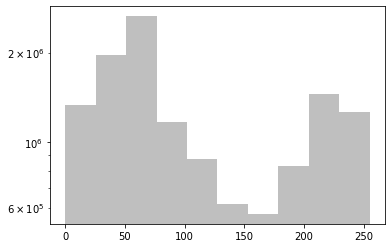

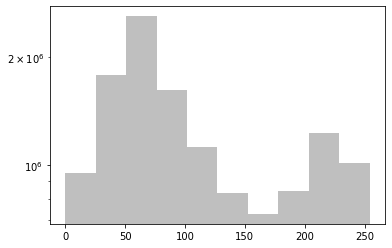

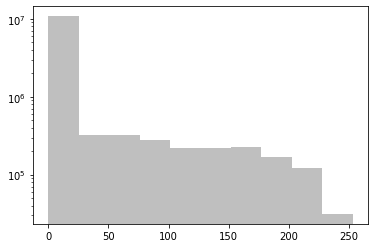

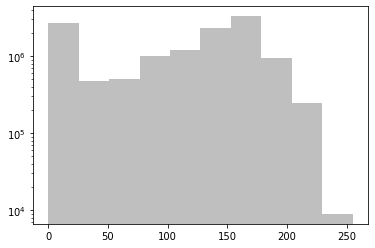

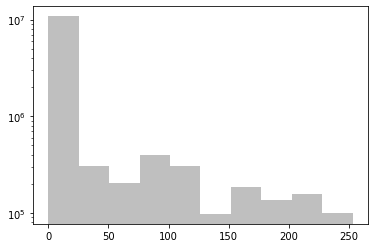

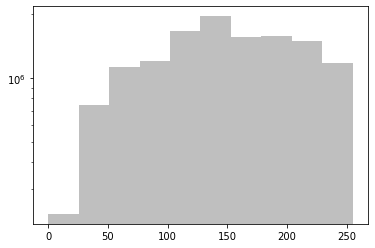

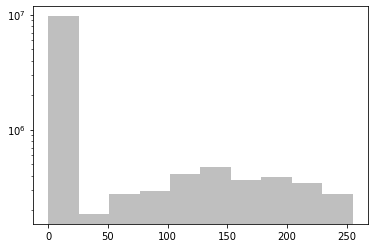

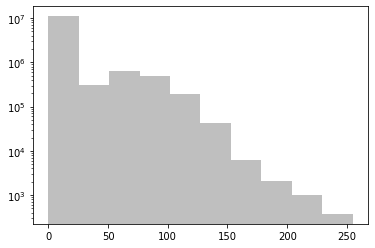

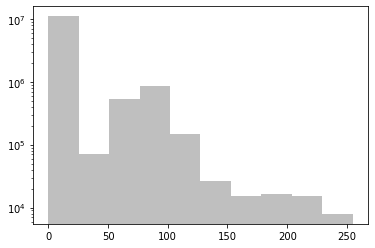

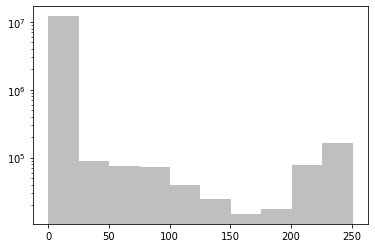

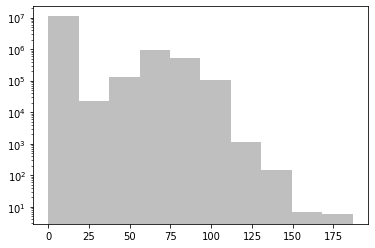

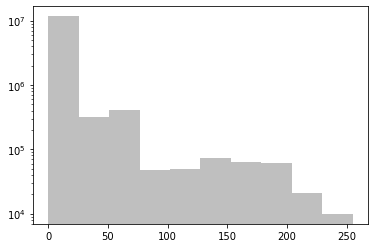

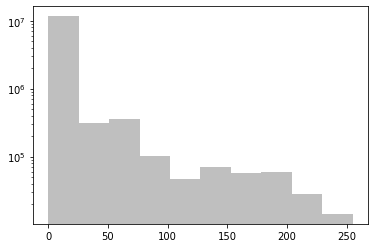

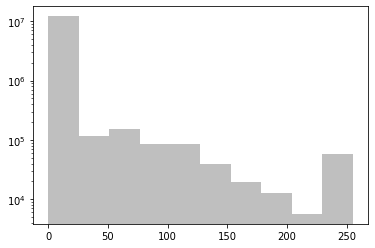

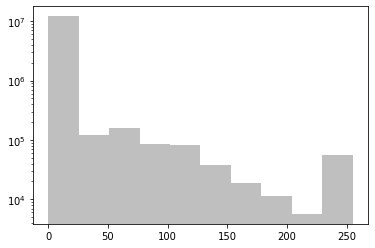

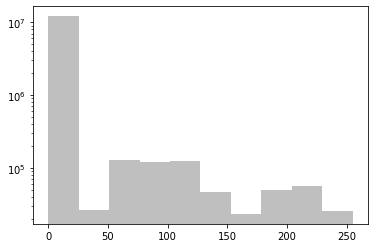

In [11]:
for i in range(len(padded_imgs)):
    get_histograms('gray', padded_imgs[i], show=True)

3) Plotting the mean, median and mode values. 

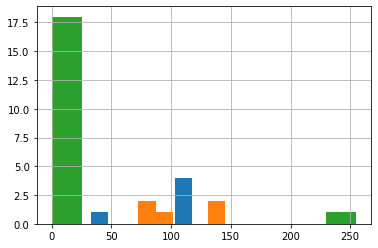

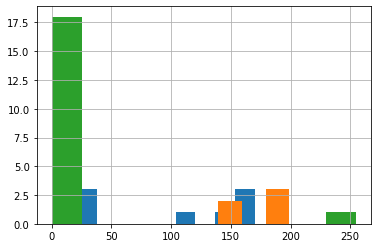

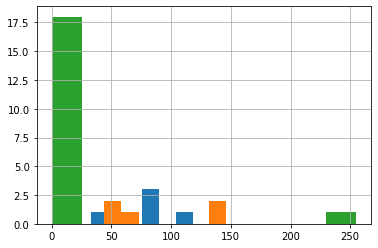

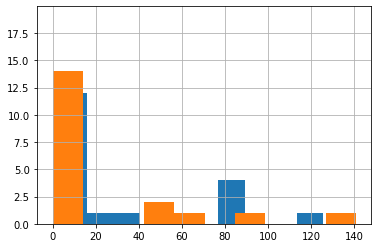

In [12]:
colors = ['gray', 'red', 'green', 'blue']
for c in colors:
    df = get_df(c, imgs_dir, padded_imgs)
    for m in ['Mean', 'Median', 'Mode']:
        col = c + ' ' + m
        df[col].hist()
    plt.show()

Mean


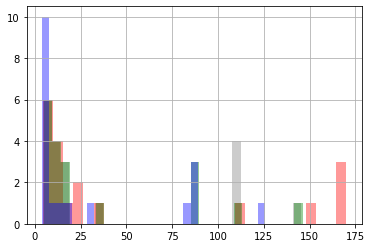

Median


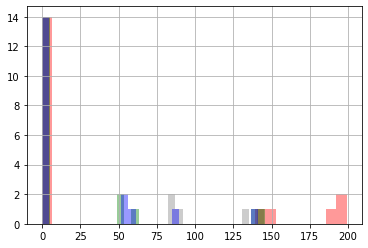

Mode


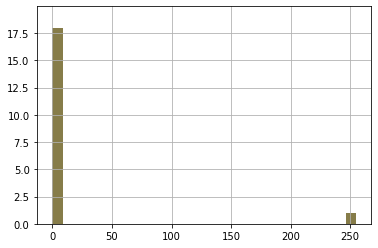

In [13]:
for m in ['Mean', 'Median', 'Mode']:
    print (m)
    for c in colors:
        df = get_df(c, imgs_dir, padded_imgs)
        col = c + ' ' + m
        df[col].hist(color = c, alpha=.4, bins = 30)
    plt.show()


In [ ]:
colors = ['gray', 'red', 'green', 'blue']
for c in colors:
    df = get_df(c, imgs_dir, padded_imgs)
    corr = df.iloc[:, 2:].T.corr().round(2)
    get_triangle_corr(corr)

In [14]:
df_list_total = pd.merge(pd.merge(df_list[0], df_list[1], how='inner', on = ['Img index', 'Img name']), df_list[2], how='inner', on = ['Img index', 'Img name'])

4) Plotting the distribution of the means

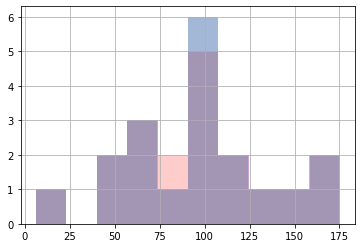

In [16]:
df_list_total['red Mean'].hist(alpha = 0.2, color = 'r')
df_list_total['green Mean'].hist(alpha = 0.2, color = 'g')
df_list_total['blue Mean'].hist(alpha = 0.2, color = 'b')
plt.show()

5) Plotting the Euclidean distance matrix

In [23]:
matrix = [[0 for i in np.arange(len(padded_imgs))] for j in range(len(padded_imgs))]

In [24]:
for i in range(len(padded_imgs)):
    for j in range(len(padded_imgs)):
        matrix[i][j] = np.linalg.norm(padded_imgs[i]-padded_imgs[j])

5.1)  Normalizing the Euclidean distance matrix

In [36]:
(pd.DataFrame(matrix)/np.mean(pd.DataFrame(matrix).mean().values)).round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000,0.776,1.520,1.520,1.587,0.636,1.317,0.675,1.318,0.694,0.959,0.000,0.393,1.370,0.471,0.483,0.422,0.420,0.456
1,0.698,0.000,1.531,1.531,1.594,0.688,1.302,0.719,1.325,0.794,0.968,0.698,0.565,1.282,0.635,0.633,0.596,0.596,0.579
2,1.564,1.554,0.000,0.000,1.702,1.552,1.453,1.552,1.487,1.523,1.585,1.564,1.544,1.595,1.558,1.557,1.549,1.549,1.547
3,1.564,1.554,0.000,0.000,1.702,1.552,1.453,1.552,1.487,1.523,1.585,1.564,1.544,1.595,1.558,1.557,1.549,1.549,1.547
4,1.531,1.518,1.747,1.747,0.000,1.523,1.477,1.521,1.504,1.504,1.538,1.531,1.511,1.534,1.526,1.525,1.515,1.515,1.515
5,0.592,0.742,1.534,1.534,1.593,0.000,1.263,0.662,1.300,0.678,0.953,0.592,0.544,1.369,0.567,0.563,0.542,0.542,0.555
6,1.307,1.331,1.565,1.565,1.568,1.351,0.000,1.348,1.436,1.403,1.313,1.307,1.311,1.269,1.309,1.311,1.312,1.312,1.327
7,0.607,0.728,1.529,1.529,1.586,0.646,1.259,0.000,1.308,0.671,1.012,0.607,0.591,1.330,0.569,0.578,0.572,0.572,0.564
8,1.729,1.727,1.609,1.609,1.600,1.722,1.705,1.718,0.000,1.726,1.699,1.729,1.668,1.682,1.692,1.693,1.673,1.673,1.677
9,0.834,0.742,1.556,1.556,1.600,0.836,1.225,0.827,1.303,0.000,1.060,0.834,0.834,1.335,0.850,0.852,0.842,0.842,0.841


5.2) Plotting the mean across the rows

In [43]:
pd.DataFrame(pd.DataFrame(matrix).mean(1)/np.mean(pd.DataFrame(matrix).mean().values), columns = ['Mean'])

,Mean
0,0.790398
1,0.880747
2,1.391376
3,1.391376
4,1.462119
5,0.848629
6,1.297032
7,0.855670
8,1.596392
9,0.987715


In [ ]:
corr = df_list_total.iloc[:, 2:].T.corr().round(2)
f, ax = plt.subplots(figsize=(11, 9))
get_triangle_corr(corr, f, ax)

In [ ]:
col_list = []
for i in range(3): 
    col_names = [' Mean', ' Median', ' Mode']
    color = colors[i]
    for j in range(3):
        col_list = np.append(col_list, color + col_names[j])
    #print (df_list[i].columns)
    corr = df_list[i].iloc[:, 2:].T.corr().round(2)
    f, ax = plt.subplots(figsize=(11, 9))
    get_triangle_corr(corr, f, ax)

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
col_list = []
for i in range(3): 
    col_names = [' Mean', ' Median', ' Mode']
    color = colors[i]
    for j in range(3):
        col_list = np.append(col_list, color + col_names[j])
    corr = df_list[i].iloc[:, 2:].T.corr().round(2)
    get_triangle_corr(corr)